In [1]:
!pip install pymongo pandas matplotlib seaborn flask

   ---------------------------------------- 0.0/727.4 kB ? eta -:--:--
   ---------------------------------------- 727.4/727.4 kB 9.9 MB/s eta 0:00:00


In [8]:
from pymongo import MongoClient

# 로컬 서버 연결
client = MongoClient("mongodb://localhost:27017/")
# db 생성 또는 연결
db = client["testdb"]
# 컬렉션 생성
collection=db["students"]

# db 생성 또는 연결
db = client["testdb2"]
# 컬렉션 생성
collection=db["students"]

# 데이터 삽입
collection.insert_one({"name":"홍길동", "age":23, "major":"컴퓨터공학"})

# 데이터 조회
for doc in collection.find():
    print(doc)

# 종료
client.close()

{'_id': ObjectId('69114edefb6536b491420ff4'), 'name': '홍길동', 'age': 23, 'major': '컴퓨터공학'}
{'_id': ObjectId('69115100fb6536b49142100b'), 'name': '홍길동', 'age': 23, 'major': '컴퓨터공학'}


In [15]:
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["students"]

# collection.insert_many([
#     {"name":"김철수", "age":21,"major":"물리학"},
#     {"name":"박민수", "age":29,"major":"영문학"},
#     {"name":"김소희", "age":31,"major":"전자공학"},
#     {"name":"우희진", "age":36,"major":"영문학"},
#     {"name":"여홍철", "age":28,"major":"체육학"},
#     {"name":"이영희", "age":22,"major":"수학"},
# ])
# client.close()

In [16]:
for student in collection.find():
    print(student)

{'_id': ObjectId('69115102fb6536b49142100d'), 'name': '김철수', 'age': 21, 'major': '물리학'}
{'_id': ObjectId('69115102fb6536b49142100e'), 'name': '박민수', 'age': 29, 'major': '영문학'}
{'_id': ObjectId('69115102fb6536b49142100f'), 'name': '김소희', 'age': 31, 'major': '전자공학'}
{'_id': ObjectId('69115102fb6536b491421010'), 'name': '우희진', 'age': 36, 'major': '영문학'}
{'_id': ObjectId('69115102fb6536b491421011'), 'name': '여홍철', 'age': 28, 'major': '체육학'}
{'_id': ObjectId('69115102fb6536b491421012'), 'name': '이영희', 'age': 22, 'major': '수학'}


In [20]:
collection.update_one({"name":"김철수"}, {"$set":{"age":45}})

UpdateResult({'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [21]:
collection.delete_one({"name":"이영희"})

DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

In [14]:
client.close()

In [23]:
import pandas as pd
from pymongo import MongoClient

In [24]:
df = pd.read_csv('./data/Subjects.csv')

In [25]:
df

,class,name,kor,eng,math,science
0,1,aaa,67,87,90,98
1,1,bbb,45,45,56,98
2,1,ccc,95,59,96,88
3,1,ddd,65,94,89,98
4,1,eee,45,65,78,98
5,1,fff,78,76,98,89
6,2,ggg,87,67,65,56
7,2,hhh,89,98,78,78
8,2,iii,100,78,56,65
9,2,jjj,99,89,87,87


In [58]:
client = MongoClient('mongodb://localhost:27017/')
db = client["testdb"]
collection = db["students_csv"]

collection.insert_many(df.to_dict("records"))

for students_csv in collection.find():
    print(students_csv)

client.close()

{'_id': ObjectId('69117994fb6536b49142102c'), 'class': 1, 'name': 'aaa', 'kor': 67, 'eng': 87, 'math': 90, 'science': 98}
{'_id': ObjectId('69117994fb6536b49142102d'), 'class': 1, 'name': 'bbb', 'kor': 45, 'eng': 45, 'math': 56, 'science': 98}
{'_id': ObjectId('69117994fb6536b49142102e'), 'class': 1, 'name': 'ccc', 'kor': 95, 'eng': 59, 'math': 96, 'science': 88}
{'_id': ObjectId('69117994fb6536b49142102f'), 'class': 1, 'name': 'ddd', 'kor': 65, 'eng': 94, 'math': 89, 'science': 98}
{'_id': ObjectId('69117994fb6536b491421030'), 'class': 1, 'name': 'eee', 'kor': 45, 'eng': 65, 'math': 78, 'science': 98}
{'_id': ObjectId('69117994fb6536b491421031'), 'class': 1, 'name': 'fff', 'kor': 78, 'eng': 76, 'math': 98, 'science': 89}
{'_id': ObjectId('69117994fb6536b491421032'), 'class': 2, 'name': 'ggg', 'kor': 87, 'eng': 67, 'math': 65, 'science': 56}
{'_id': ObjectId('69117994fb6536b491421033'), 'class': 2, 'name': 'hhh', 'kor': 89, 'eng': 98, 'math': 78, 'science': 78}
{'_id': ObjectId('691179

In [28]:
import base64
from io import BytesIO
from pymongo import MongoClient

In [29]:
with open("./data/gpt-img1.jpg", "rb") as img_file:
    encode = base64.b64encode(img_file.read()).decode("utf-8")

In [30]:
encode

'/9j/4AAQSkZJRgABAQEAYABgAAD/4QBGRXhpZgAATU0AKgAAAAgABAESAAMAAAABAAEAAFEQAAEAAAABAQAAAFERAAQAAAABAAAAAFESAAQAAAABAAAAAAAAAAD/2wBDAAIBAQIBAQICAgICAgICAwUDAwMDAwYEBAMFBwYHBwcGBwcICQsJCAgKCAcHCg0KCgsMDAwMBwkODw0MDgsMDAz/2wBDAQICAgMDAwYDAwYMCAcIDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAEsAfQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6g/aS1eHwh+zb8RtWu9U1Hw/b2Hhi9mOrWD+Xe6VmJgt1AcqTJG3zAAjJHfpX5rf8FLfHnjX

In [36]:
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["images"]

collection.insert_one({"filename": "gpt1.jpg", "data":encode})
img_data = collection.find_one({"filename": "gpt1.jpg"})['data']

with open("restored_gpt1.jpg", "wb") as out_file:
    out_file.write(base64.b64decode(img_data))

client.close()

In [44]:
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["images"]


document = collection.find_one({"filename": "gpt1.jpg"})

print(base64.b64decode(img_data))

client.close()

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x00FExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00Q\x10\x00\x01\x00\x00\x00\x01\x01\x00\x00\x00Q\x11\x00\x04\x00\x00\x00\x01\x00\x00\x00\x00Q\x12\x00\x04\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x01,\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x0

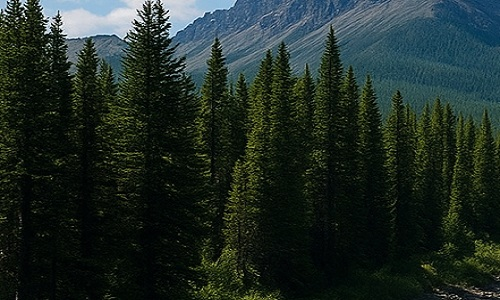

In [46]:
from PIL import Image

if document:
    img_data = document['data']
    img_binary = base64.b64decode(img_data)
    img = Image.open(BytesIO(img_binary))
    display(img)

print(BytesIO(img_binary))

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
from matplotlib import font_manager,rc

In [57]:
font_path = "C://Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

plt.rcParams['axes.unicode_minus'] = False

In [75]:
data

,_id,class,name,kor,eng,math,science
0,69117994fb6536b49142102c,1,aaa,67,87,90,98
1,69117994fb6536b49142102d,1,bbb,45,45,56,98
2,69117994fb6536b49142102e,1,ccc,95,59,96,88
3,69117994fb6536b49142102f,1,ddd,65,94,89,98
4,69117994fb6536b491421030,1,eee,45,65,78,98
5,69117994fb6536b491421031,1,fff,78,76,98,89
6,69117994fb6536b491421032,2,ggg,87,67,65,56
7,69117994fb6536b491421033,2,hhh,89,98,78,78
8,69117994fb6536b491421034,2,iii,100,78,56,65
9,69117994fb6536b491421035,2,jjj,99,89,87,87


In [100]:
import random
import pandas as pd

client = MongoClient("mongodb://localhost:27017/")
db = client['testdb']
collection = db['students']

names_first = ["김", "박", "이", "최", "정", "유", "임", "마", "윤", "조"]
names_last = ["철수", "민수", "성택", "훈용", "봉철", "은현", "수민", "영호", "지훈", "지수", "지영", "하늘", "도현"]
majors = ["수학", "물리학", "화학", "생물학", "컴퓨터공학", "전자공학", "기계공학", "통계학", "경제학", "심리학"]

data = []

for _ in range(10000):
    name = random.choice(names_first) + random.choice(names_last)
    age = random.randint(20, 51)
    major = random.choice(majors)
    data.append({"name": name, "age": age, "major": major})

df = pd.DataFrame(data)

collection.insert_many(data)


print(df)


     name  age  major
0     이지수   27     화학
1     최봉철   22     수학
2     임지영   41   기계공학
3     윤훈용   28   전자공학
4     박도현   33     수학
...   ...  ...    ...
9995  윤철수   22   기계공학
9996  정봉철   21    경제학
9997  박은현   41     화학
9998  박지영   33    생물학
9999  김수민   42  컴퓨터공학

[10000 rows x 3 columns]


In [ ]:
collection.insert_many([
    {"name": "김철수", "age": 22, "major": "수학"},
    {"name": "박민수", "age": 23, "major": "물리학"},
    {"name": "임성택", "age": 24, "major": "화학"},
    {"name": "김훈용", "age": 21, "major": "생물학"},
    {"name": "유봉철", "age": 25, "major": "컴퓨터공학"},
    {"name": "마은현", "age": 22, "major": "전자공학"},
])


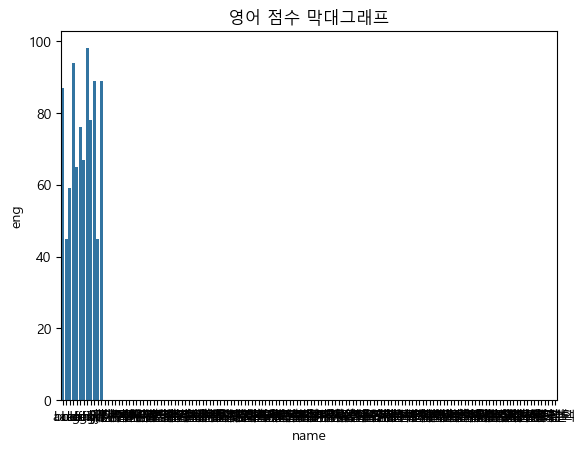

In [99]:
client = MongoClient("mongodb://localhost:27017/")
db = client['testdb']
collection = db['students_csv']

cursor = collection.find()

data = pd.DataFrame(list(cursor))

sns.barplot(data=data, x="name", y="eng")
plt.title("영어 점수 막대그래프")
plt.show()


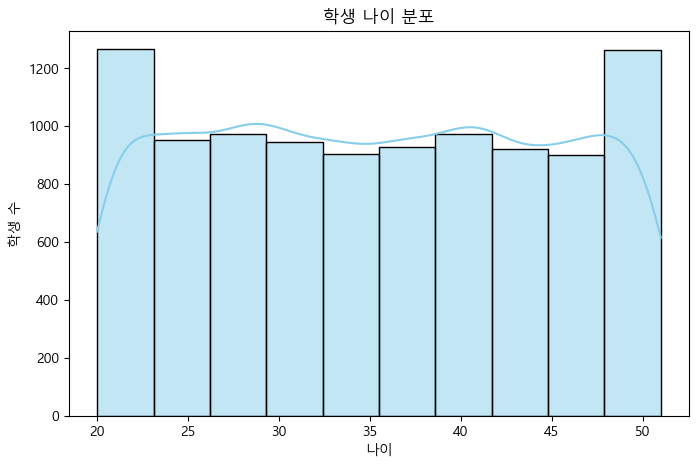

C:\Users\human\AppData\Local\Temp\ipykernel_13664\3762822005.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='major', data=data, palette="pastel")


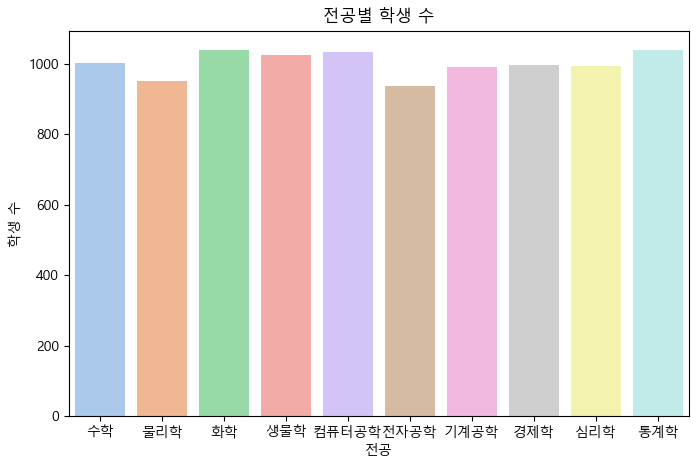

C:\Users\human\AppData\Local\Temp\ipykernel_13664\3762822005.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="major", y="age", data=data, palette="Set2")


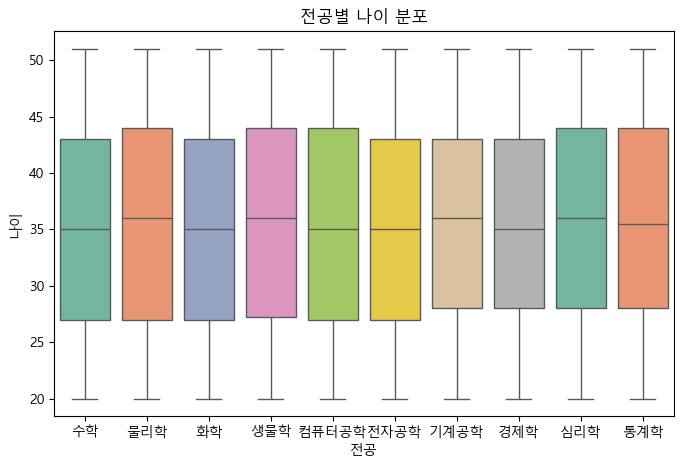

In [102]:
client = MongoClient("mongodb://localhost:27017/")
db = client['testdb']
collection = db['students']

cursor = collection.find()

data = pd.DataFrame(list(cursor))

# sns.barplot(data=data, x="name", y="eng")
# plt.title("영어 점수 막대그래프")
# plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=10, kde=True, color="skyblue")
plt.title("학생 나이 분포")
plt.xlabel("나이")
plt.ylabel("학생 수")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='major', data=data, palette="pastel")
plt.title("전공별 학생 수")
plt.xlabel("전공")
plt.ylabel("학생 수")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="major", y="age", data=data, palette="Set2")
plt.title("전공별 나이 분포")
plt.xlabel("전공")
plt.ylabel("나이")
plt.show()

In [98]:
data

,_id,name,age,major
0,69118532fb6536b49142104a,김철수,22,수학
1,69118532fb6536b49142104b,박민수,23,물리학
2,69118532fb6536b49142104c,임성택,24,화학
3,69118532fb6536b49142104d,김훈용,21,생물학
4,69118532fb6536b49142104e,유봉철,25,컴퓨터공학
5,69118532fb6536b49142104f,마은현,22,전자공학


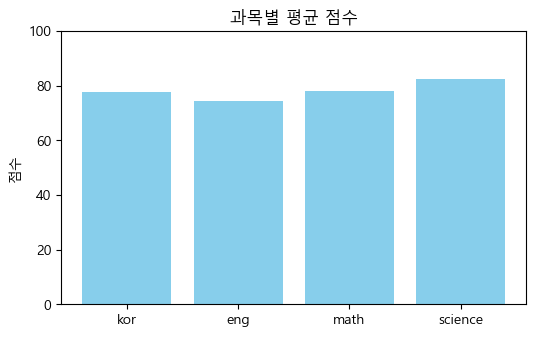

In [ ]:
import tkinter as tk
from tkinter import ttk
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import font_manager, rc

# 한글 폰트 설정 (Windows용)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# MongoDB 연결
client = MongoClient("mongodb://localhost:27017/")
db = client['testdb']
collection = db['students_csv']

# 데이터 불러오기
df = pd.DataFrame(list(collection.find()))

# Tkinter 메인 윈도우
root = tk.Tk()
root.title("학생 점수 대시보드")
root.geometry("900x700")

# === 제목 ===
title_label = tk.Label(root, text="학생 점수 대시보드", font=("Malgun Gothic", 18, "bold"))
title_label.pack(pady=10)

# === Treeview 테이블 ===
frame_table = tk.Frame(root)
frame_table.pack(pady=10)

columns = list(df.columns)
tree = ttk.Treeview(frame_table, columns=columns, show="headings", height=10)

# 컬럼 헤더 설정
for col in columns:
    tree.heading(col, text=col)
    tree.column(col, width=100, anchor="center")

# 데이터 삽입
for _, row in df.iterrows():
    tree.insert("", "end", values=list(row))

tree.pack()

# === Matplotlib 그래프 표시 ===
frame_graph = tk.Frame(root)
frame_graph.pack(pady=20)

# 과목별 평균 계산
mean_scores = df[["kor", "eng", "math", "science"]].mean()

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(mean_scores.index, mean_scores.values, color="skyblue")
ax.set_title("과목별 평균 점수")
ax.set_ylabel("점수")
ax.set_ylim(0, 100)

# Tkinter에 matplotlib 그래프 추가
canvas = FigureCanvasTkAgg(fig, master=frame_graph)
canvas.draw()
canvas.get_tk_widget().pack()

# === 종료 버튼 ===
exit_button = tk.Button(root, text="닫기", command=root.destroy, font=("Malgun Gothic", 12))
exit_button.pack(pady=10)

# Tkinter 실행
root.mainloop()